In [1]:
## Resume Screening

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as snb

In [3]:
df = pd.read_csv('C:/Users/agni.qa.AGNI.000/Desktop/Praveen/DS/Praveen - Projects/UpdatedResumeDataSet.csv')

In [4]:
df.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  962 non-null    object
 1   Resume    962 non-null    object
dtypes: object(2)
memory usage: 7.6+ KB


In [6]:
df.describe().transpose()

,count,unique,top,freq
Category,962,25,Java Developer,84
Resume,962,166,"Technical Skills Web Technologies: Angular JS,...",18


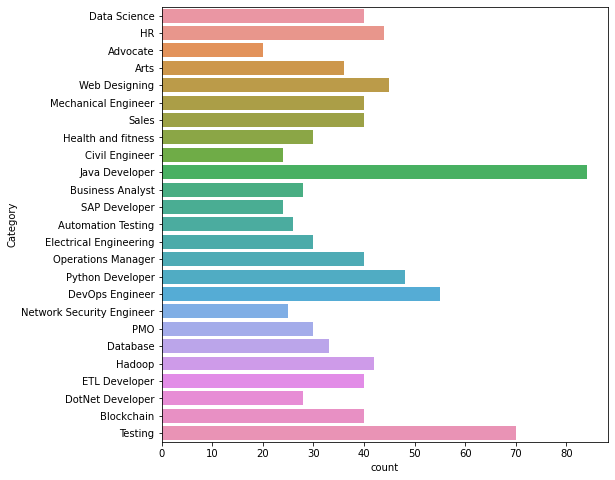

In [7]:
plt.figure(figsize=(8,8))
snb.countplot(y="Category", data=df)
plt.show()

In [8]:
import nltk

In [9]:
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [10]:
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [11]:
lemma = WordNetLemmatizer()

In [12]:
import re

In [13]:
corpus = []

for i in range(0,len(df)):
    words = re.sub('[^a-zA-Z]',' ',df['Resume'][i])
    words = words.lower()
    words = words.split()
    words = [lemma.lemmatize(word) for word in words if word not in set(stopwords.words('english'))]
    words = ' '.join(words)
    corpus.append(words)

In [14]:
corpus

['skill programming language python panda numpy scipy scikit learn matplotlib sql java javascript jquery machine learning regression svm na bayes knn random forest decision tree boosting technique cluster analysis word embedding sentiment analysis natural language processing dimensionality reduction topic modelling lda nmf pca neural net database visualization mysql sqlserver cassandra hbase elasticsearch j dc j plotly kibana matplotlib ggplot tableau others regular expression html cs angular logstash kafka python flask git docker computer vision open cv understanding deep learning education detail data science assurance associate data science assurance associate ernst young llp skill detail javascript exprience month jquery exprience month python exprience monthscompany detail company ernst young llp description fraud investigation dispute service assurance technology assisted review tar technology assisted review assist accelerating review process run analytics generate report core m

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [17]:
y = df["Category"]

In [18]:
cv = TfidfVectorizer()

In [19]:
x = cv.fit_transform(corpus)

In [20]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=42)

In [21]:
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
import pickle
import sklearn
import scipy

In [22]:
def naive_classifier(x_train, x_test, y_train, y_test):
    
    classifier_naive = MultinomialNB()
    classifier_naive.fit(x_train, y_train)

    y_pred = classifier_naive.predict(x_test)

    
    cm = confusion_matrix(y_test, y_pred)

    return print(f"Train score : {classifier_naive.score(x_train, y_train)}\nTest score : {classifier_naive.score(x_test, y_test)}")

In [23]:
def random_classifier(x_train, x_test, y_train, y_test):
    
    classifier_rf = RandomForestClassifier()
    classifier_rf.fit(x_train, y_train)

    y_pred = classifier_rf.predict(x_test)

    cm = confusion_matrix(y_test, y_pred)

    return print(f"Train score : {classifier_rf.score(x_train, y_train)}\nTest score : {classifier_rf.score(x_test, y_test)}")

In [24]:
def ada_classifier(x_train, x_test, y_train, y_test):
    
    classifier_ab = AdaBoostClassifier()
    classifier_ab.fit(x_train, y_train)

    y_pred = classifier_ab.predict(x_test)

    cm = confusion_matrix(y_test, y_pred)

    return print(f"Train score : {classifier_ab.score(x_train, y_train)}\nTest score : {classifier_ab.score(x_test, y_test)}")

In [25]:
def knn_classifier(x_train, x_test, y_train, y_test):
    
    classifier_knn = KNeighborsClassifier()
    classifier_knn.fit(x_train, y_train)

    y_pred = classifier_knn.predict(x_test)

    cm = confusion_matrix(y_test, y_pred)

    return print(f"Train score : {classifier_knn.score(x_train, y_train)}\nTest score : {classifier_knn.score(x_test, y_test)}")

In [26]:
def svm_classifier(x_train, x_test, y_train, y_test):
    
    classifier_svm = SVC()
    classifier_svm.fit(x_train, y_train)

    y_pred = classifier_svm.predict(x_test)

    cm = confusion_matrix(y_test, y_pred)

    return print(f"Train score : {classifier_svm.score(x_train, y_train)}\nTest score : {classifier_svm.score(x_test, y_test)}")

In [27]:
import warnings
warnings.filterwarnings('ignore')

In [28]:
def print_score(X_train, X_test, y_train, y_test):
    print("Naivi Baise:\n")
    naive_classifier(X_train, X_test, y_train, y_test)

    print("-"*100)
    print()

    print("Random Forest:\n")
    random_classifier(X_train, X_test, y_train, y_test)

    print("-"*100)
    print()
    
    print("AdaBoost:\n")
    ada_classifier(X_train, X_test, y_train, y_test)

    print("-"*100)
    print()
    
    print("KNN:\n")
    knn_classifier(X_train, X_test, y_train, y_test)

    print("-"*100)
    print()
    
    print("SVM:\n")
    svm_classifier(X_train, X_test, y_train, y_test)

    print("-"*100)
    print()
    

In [29]:
print_score(x_train, x_test, y_train, y_test)

Naivi Baise:

Train score : 0.9732540861812778
Test score : 0.9377162629757786
----------------------------------------------------------------------------------------------------

Random Forest:

Train score : 1.0
Test score : 0.9930795847750865
----------------------------------------------------------------------------------------------------

AdaBoost:

Train score : 0.32392273402674593
Test score : 0.3356401384083045
----------------------------------------------------------------------------------------------------

KNN:

Train score : 0.986627043090639
Test score : 0.9826989619377162
----------------------------------------------------------------------------------------------------

SVM:

Train score : 1.0
Test score : 0.9930795847750865
----------------------------------------------------------------------------------------------------



In [82]:
model = KNeighborsClassifier()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

In [83]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

In [84]:
print(accuracy_score(y_test,y_pred))

0.9826989619377162


In [85]:
# Hyper Parameter Tunning
from sklearn.model_selection import GridSearchCV

In [88]:
parameters = {'n_neighbors':[15,10.15,20.50,55,200]}

grid_search = GridSearchCV(estimator = model,
                          param_grid = parameters,
                          scoring = 'accuracy',
                          cv = 10,
                          n_jobs = -1)
grid_search = grid_search.fit(x_train, y_train)

In [89]:
print('best_accuracy = ',grid_search.best_score_)
print('best_parameters = ', grid_search.best_params_)

best_accuracy =  0.9242098331870061
best_parameters =  {'n_neighbors': 15}


In [93]:
model_knn = KNeighborsClassifier(n_neighbors=5)
model_knn.fit(x_train, y_train)
y_pred = model_knn.predict(x_test)

In [94]:
print(accuracy_score(y_test,y_pred))

0.9826989619377162


In [97]:
x = 'i have a 4 yeras of experiance in python'

x = cv.transform([x])

In [98]:
model_knn.predict(x)

array(['Python Developer'], dtype=object)